In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('news.csv',index_col=False)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.isnull().sum() #Check if Dataset contains null values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

([<matplotlib.patches.Wedge at 0x1c96920a6d0>,
 [Text(-0.0005979378966283514, 1.1999998510292706, 'Fake'),
  Text(0.0005482127279955375, -1.0999998633921755, 'Real')],
 [Text(-0.0003487971063665383, 0.6999999131004079, '50%'),
  Text(0.00029902512436120224, -0.5999999254866412, '50%')])

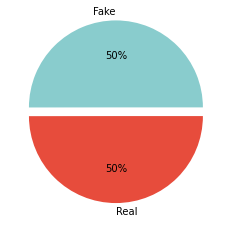

In [14]:
# visualisation To check if the data is unbalanced
y =df['label'].value_counts(sort = True).index
n = df['label'].value_counts(sort = True)
colors= ['#89CCCD','#E74C3C']
explode = (0.1,0)
labels= ['Fake','Real']
plt.pie(n,labels=labels,colors=colors,explode=explode,autopct='%1.0f%%')

In [12]:
df.drop_duplicates(subset=['text','title'],keep='first', inplace=True) # dropping any duplicate news

# processing text data

In [47]:
from nltk.corpus import stopwords

In [40]:
new= df.copy()

In [41]:
# Making all letters lowercase
new['text'] = new['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [42]:
# Removing Punctuation, Symbols
new['text'] = new['text'].str.replace('[^\w\s]',' ')

C:\Users\User\AppData\Local\Temp/ipykernel_85132/2444312122.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new['text'] = new['text'].str.replace('[^\w\s]',' ')


In [44]:
stop = stopwords.words('english')
new['text'] = new['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [53]:
# Mapping real/fake to binary 1,0 
mapp = {'FAKE':1 , 'REAL':0}
n = df.replace({'label':mapp})

# Splitting dataset and creating models

In [67]:
# Splitting into training and testing data in 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(new['text'], n['label'], random_state=42, test_size=0.40, shuffle=True)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Extracting TF-IDF
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,4))
X_train_tfidf = tfidf.fit_transform(xtrain)
X_val_tfidf = tfidf.fit_transform(xtest)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
# Extracting Count Vectors
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(new['text'])
X_train_count =  count_vect.transform(xtrain)
X_val_count =  count_vect.transform(xtest)

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model 1.1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, ytrain)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, ytest))

naive bayes tfidf accuracy 0.6127625842251289


In [74]:
#Model 1.2 Randomforest
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_tfidf, ytrain)
y_pred = rf.predict(X_val_tfidf)
print('random forest tfidf accuracy %s' % accuracy_score(y_pred, ytest))


random forest tfidf accuracy 0.638525564803805


In [75]:
## Building models using count vectors feature
# Model 2.1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_count, ytrain)
y_pred1 = nb.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred1, ytest))


naive bayes count vectors accuracy 0.8973444312326595


In [76]:
# Model 2.2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train_count, y_train)
y_pred4 = rf.predict(X_val_count)
print('random forest with count vectors accuracy %s' % accuracy_score(y_pred4, ytest))

random forest with count vectors accuracy 0.8513674197384067
